In [1]:
import random

In [2]:
import cv2

In [3]:
import time

In [4]:
import pyautogui

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
import pytesseract

# Utility functions

In [10]:
def take_screen_shot(region=None):
    """
    region: four-integer tuple of the left, top,
    width, and height of the region to capture
    """
    
    print('Waiting 5 seconds before screen shot')
    print('Please change the browser window to semantris blocks mode')
    time.sleep(5)
    
    return pyautogui.screenshot(region=region)

In [11]:
FIGSIZE = (6,6)
def plot_img(arr, fs=FIGSIZE, cmap='gray', title=None):
    plt.figure(figsize=fs)
    plt.imshow(arr, cmap=cmap)
    plt.title(title)
    plt.show()

# Screen processing

Waiting 5 seconds before screen shot
Please change the browser window to semantris blocks mode


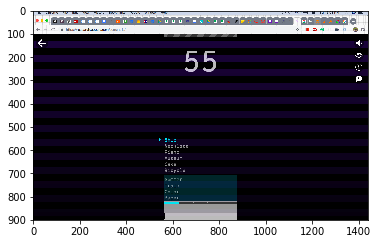

In [80]:
screen = take_screen_shot()
plot_img(screen)

### Crop screenshot

Waiting 5 seconds before screen shot
Please change the browser window to semantris blocks mode


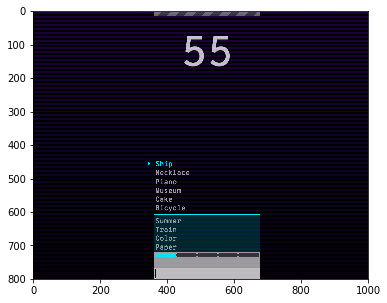

In [81]:
# region: four-integer tuple of the left, top
# width, and height of the region to capture
# for my system the screen is 1440 x 900
screen = take_screen_shot(region=(200, 100, 1000, 800))
plot_img(screen)

### Gray scale conversion

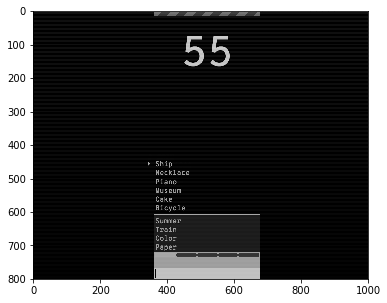

In [101]:
screen2 = cv2.cvtColor(np.array(screen), cv2.COLOR_RGB2GRAY)
plot_img(screen2)

### Template matching

To find the highlighted words, location of a template image (triangle pointing towards right) is searched in the grayscale image.

In [102]:
template_img = cv2.imread('./gray-template.png', 0)
w, h = template_img.shape[::-1]

res_img = cv2.matchTemplate(
    screen2, template_img, cv2.TM_CCOEFF_NORMED
)

# find the screen image section where the template is matching
# with the given threshold range
threshold = 0.75
loc = np.where(res_img >= threshold)
for pt in zip(*loc[::-1]):
    # crop rectangle section around the selected template
    # a rectangle right next to the template
    
    cropped_image = screen2[pt[1]:pt[1] + h + 5, pt[0] + w + 5:pt[0] + w + 205]
    cv2.rectangle(screen2, pt, (pt[0] + w, pt[1] + h), 255, 1)

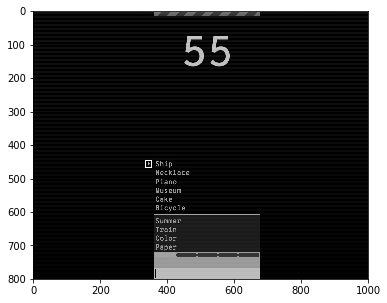

In [103]:
plot_img(screen2)

### Highlighted word image

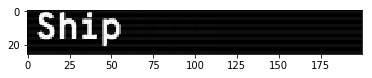

In [104]:
plot_img(cropped_image)

### Highlighted word text

In [105]:
pytesseract.image_to_string(cropped_image)

'Ship'